In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
# sns.set(font_scale=2.5) 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [3]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,30):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

In [4]:
df = df.drop(["season","league","name","Apps"], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       17173 non-null  float64
 1   Mins      17173 non-null  float64
 2   Assists   17173 non-null  float64
 3   Rating    17173 non-null  float64
 4   Tackles   17173 non-null  float64
 5   Inter     17172 non-null  float64
 6   Fouls     17173 non-null  float64
 7   Offsides  17173 non-null  float64
 8   Clear     17173 non-null  float64
 9   Drb       17173 non-null  float64
 10  Blocks    17173 non-null  float64
 11  OwnG      17173 non-null  float64
 12  Goals     17173 non-null  float64
 13  SpG       17173 non-null  float64
 14  KeyP      17173 non-null  float64
 15  Drb.1     17173 non-null  float64
 16  Fouled    17173 non-null  float64
 17  Off       17173 non-null  float64
 18  Disp      17173 non-null  float64
 19  UnsTch    17173 non-null  float64
 20  KeyP.1    17173 non-null  fl

In [6]:
df.isnull().sum()

age         2
Mins        2
Assists     2
Rating      2
Tackles     2
Inter       3
Fouls       2
Offsides    2
Clear       2
Drb         2
Blocks      2
OwnG        2
Goals       2
SpG         2
KeyP        2
Drb.1       2
Fouled      2
Off         2
Disp        2
UnsTch      2
KeyP.1      2
AvgP        2
PS%         2
Crosses     2
LongB       2
ThrB        2
dtype: int64

In [7]:
null_index = df[df.isnull().any(axis=1)].index
df[df.isnull().any(axis=1)]

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,35.0,2884.0,2.4,7.48,0.5,NaN,1.1,0.0,0.9,0.3,...,1.0,1.4,0.5,1.1,1.5,22.0,69.9,0.1,1.5,0.1
6632,29.0,90.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11115,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,5.0,60.0,0.0,0.0,0.0


In [8]:
df = df.drop(null_index)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,34.0,2881.0,21.0,8.71,0.6,0.2,0.6,0.0,0.0,0.5,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,27.0,90.0,0.0,7.54,1.0,2.0,0.0,1.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,12.0,75.0,0.0,1.0,0.0
2,29.0,3091.0,3.0,7.47,2.7,1.9,2.5,0.1,1.9,1.7,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,33.0,3155.0,8.0,7.44,0.5,0.2,0.6,0.0,0.8,0.4,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,34.0,2002.0,8.0,7.33,0.1,0.0,0.5,0.0,0.4,0.4,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,24.0,90.0,0.0,5.71,1.0,0.0,2.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,50.0,70.0,0.0,2.0,0.0
17167,34.0,90.0,1.0,5.55,0.0,1.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,49.0,81.6,0.0,2.0,0.0
17168,26.0,90.0,0.0,5.36,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,66.7,0.0,5.0,0.0
17169,26.0,87.0,2.0,5.29,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,1.0,30.0,80.0,0.0,2.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, y_train = train_test_split(df, random_state=13)

In [11]:
X_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
10019,27.0,32.0,0.5,6.18,0.5,0.0,1.0,0.0,0.0,0.5,...,0.5,0.0,0.0,0.5,0.0,9.8,82.1,0.0,1.5,0.0
11092,20.0,20.0,0.5,6.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13542,22.0,824.0,0.6,6.37,1.7,1.5,1.1,0.1,1.2,1.4,...,0.2,0.4,0.0,0.4,0.6,33.1,73.6,0.3,2.8,0.0
7839,23.0,1825.0,2.1,6.84,0.8,0.6,0.3,0.0,0.1,0.7,...,1.0,0.6,0.1,1.1,0.3,49.1,80.8,0.1,2.1,0.0
10606,20.0,180.0,0.5,5.42,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.0,0.0,42.0,54.8,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,32.0,2097.0,1.0,6.72,0.0,0.1,0.0,0.0,0.6,0.0,...,0.2,0.0,0.0,0.0,0.0,25.9,56.8,0.0,5.6,0.0
866,33.0,2055.0,0.0,6.47,1.4,1.1,1.0,0.1,1.3,1.5,...,0.8,0.0,0.5,0.3,0.5,44.6,85.5,0.1,3.4,0.0
74,30.0,3167.0,6.0,6.88,0.7,0.4,0.8,0.1,0.4,0.6,...,1.3,0.1,1.4,1.0,2.2,57.4,88.4,1.3,3.5,0.1
14512,30.0,1097.0,0.9,6.44,1.4,1.2,1.1,0.1,0.7,0.5,...,0.3,1.4,0.2,0.8,0.6,16.3,67.7,0.8,1.2,0.0


In [12]:
# X_train.to_csv("X_train.csv", index=False)

In [13]:
y_train

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
17083,27.0,62.0,4.0,6.21,1.0,0.0,3.0,0.0,1.0,1.0,...,2.0,0.0,0.0,2.0,1.0,13.0,53.8,1.0,0.0,0.0
10629,32.0,2175.0,2.1,7.10,1.1,0.4,1.0,0.0,0.9,0.8,...,0.8,0.8,0.1,1.3,1.3,30.4,75.4,0.2,0.6,0.1
10088,20.0,21.0,0.0,5.92,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,33.3,0.0,0.0,0.0
7367,27.0,1173.0,1.6,6.84,2.3,1.3,1.0,0.2,1.1,0.7,...,1.0,1.4,0.0,0.7,1.0,15.3,62.5,0.1,0.5,0.0
5255,22.0,1796.0,3.0,6.32,0.4,0.1,1.1,0.0,0.1,0.2,...,0.8,0.2,1.5,1.5,0.5,6.9,61.6,0.1,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,30.0,1906.0,2.0,6.76,1.6,1.3,1.5,0.3,1.8,1.3,...,0.8,0.0,0.7,1.3,0.7,39.2,80.6,0.5,2.3,0.0
10147,26.0,450.0,3.8,6.99,1.6,0.6,1.8,0.0,0.6,1.2,...,1.4,1.4,0.0,1.6,1.4,37.2,75.2,1.0,2.7,0.0
981,25.0,142.0,0.0,6.31,0.2,0.2,0.8,0.0,0.0,0.4,...,1.4,0.0,0.4,0.8,0.4,7.6,73.7,0.0,0.0,0.0
8164,32.0,26.0,0.0,6.19,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,7.0,71.4,0.0,0.0,0.0


In [14]:
defensiveDF = ['Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG']
offensiveDF = ['Goals', 'Assists', 'SpG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch']
passingDF = ['Assists','KeyP','AvgP','PS%','Crosses','LongB','ThrB']

In [15]:
rest = ['Mins', 'Rating']

In [16]:
important_features_defen = ['Tackles', 'Inter', 'Blocks' ]
important_features_offen = ['Goals', 'Assists']

<AxesSubplot:xlabel='Tackles'>

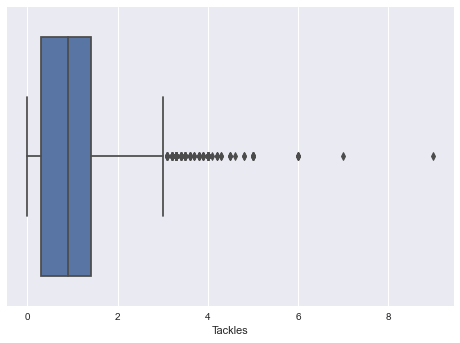

In [17]:
sns.boxplot('Tackles', data=X_train)

<AxesSubplot:xlabel='Inter'>

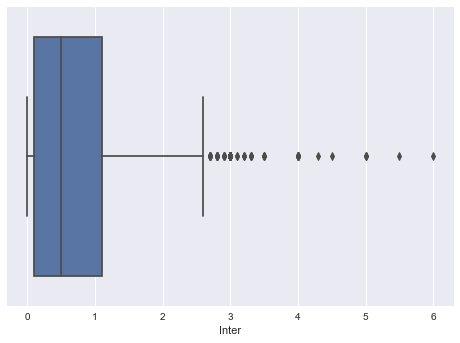

In [18]:
sns.boxplot('Inter', data=X_train)

<AxesSubplot:xlabel='Blocks'>

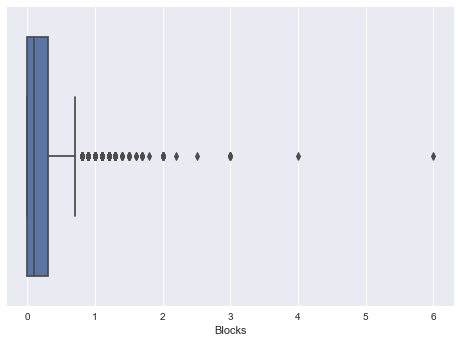

In [19]:
sns.boxplot('Blocks', data=X_train)

<AxesSubplot:xlabel='Goals'>

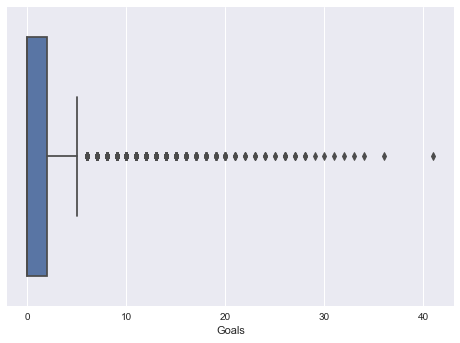

In [20]:
sns.boxplot('Goals', data=X_train)

<AxesSubplot:xlabel='Assists'>

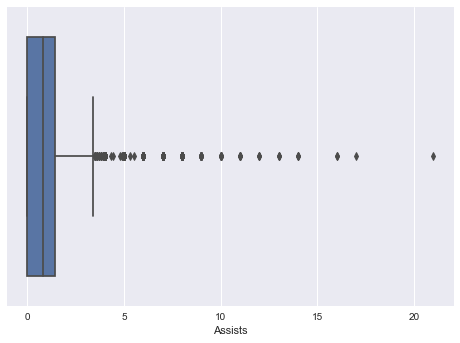

In [21]:
sns.boxplot('Assists', data=X_train)

<AxesSubplot:ylabel='Frequency'>

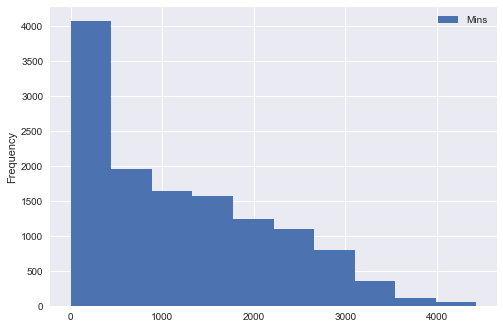

In [22]:
import matplotlib.pyplot as plt
X_train[['Mins']].plot(kind='hist')

<AxesSubplot:ylabel='Count'>

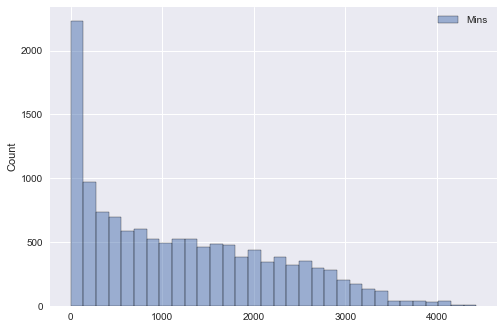

In [23]:
import seaborn as sns
sns.histplot(X_train[['Mins']])

<AxesSubplot:ylabel='Count'>

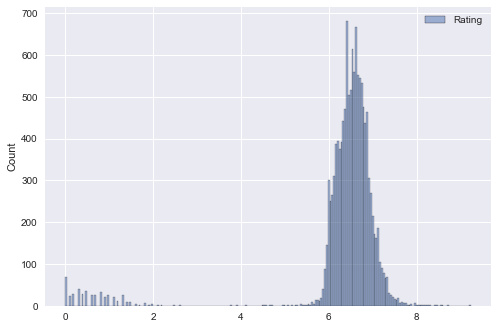

In [24]:
sns.histplot(X_train[['Rating']])

<AxesSubplot:xlabel='Mins', ylabel='Rating'>

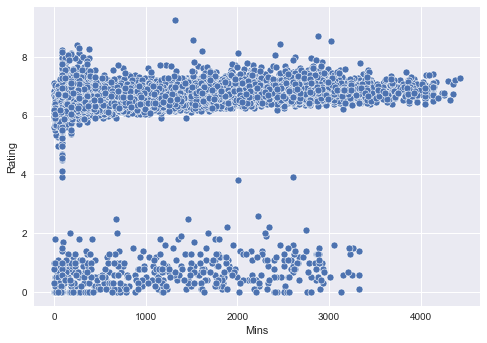

In [25]:
sns.scatterplot('Mins', 'Rating', data=X_train)

In [26]:
from sklearn.preprocessing import StandardScaler


standard_scaler = StandardScaler()

# df = pd.read_csv("./X_train.csv" , low_memory=False)
df_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)

In [27]:
df_scaled

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,0.018877,-1.164780,-0.401226,-0.144043,-0.585909,-1.046938,0.340419,-0.483070,-0.872718,-0.094999,...,-0.195159,-0.861859,-0.632249,-0.275392,-0.148652,-0.929994,0.513388,-0.622122,-0.114271,-0.227989
1,-1.454413,-1.176835,-0.401226,-0.300562,-1.236886,-1.046938,-1.429502,-0.483070,-0.872718,-1.156609,...,-1.025493,-0.861859,-0.632249,-1.052011,-0.148652,-1.537736,-3.731081,-0.622122,-0.880744,-0.227989
2,-1.033473,-0.369153,-0.323270,0.021172,0.976434,1.320566,0.517411,-0.045097,0.042021,1.815899,...,-0.693360,-0.184955,-0.632249,-0.430716,-0.146556,0.514943,0.073948,0.086772,0.550006,-0.227989
3,-0.823003,0.636431,0.846066,0.429862,-0.195323,-0.099936,-0.898526,-0.483070,-0.796489,0.329645,...,0.635176,0.153496,-0.382377,0.656549,-0.147604,1.507175,0.446179,-0.385824,0.192319,-0.227989
4,-1.454413,-1.016102,-0.401226,-0.804902,-1.236886,-1.046938,-1.429502,-0.483070,-0.872718,-1.156609,...,-0.195159,-0.015729,-0.632249,-1.052011,-0.148652,1.066872,-0.897988,-0.622122,5.506535,-0.227989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12873,1.071227,0.909676,-0.011447,0.325515,-1.236886,-0.889104,-1.429502,-0.483070,-0.415348,-1.156609,...,-0.693360,-0.861859,-0.632249,-1.052011,-0.148652,0.068439,-0.794591,-0.622122,1.980757,-0.227989
12874,1.281697,0.867484,-0.791004,0.108127,0.585848,0.689232,0.340419,-0.045097,0.118249,2.028221,...,0.303042,-0.861859,0.617115,-0.586040,-0.146906,1.228110,0.689164,-0.385824,0.856596,-0.227989
12875,0.650287,1.984576,3.886339,0.464644,-0.325519,-0.415603,-0.013565,-0.045097,-0.567805,0.117323,...,1.133376,-0.692633,2.865971,0.501226,-0.140967,2.021895,0.839090,2.449753,0.907694,0.480004
12876,0.650287,-0.094903,-0.089403,0.082041,0.585848,0.847066,0.517411,-0.045097,-0.339120,-0.094999,...,-0.527293,1.507303,-0.132504,0.190578,-0.146556,-0.526900,-0.231074,1.268263,-0.267565,-0.227989


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_scaled)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

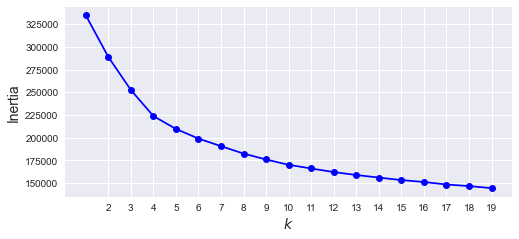

In [29]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.xticks(range(2, 20,1))
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.x_axis([1, 20])
# save_fig("inertia_vs_k_plot")
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]


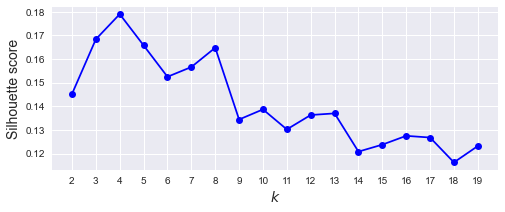

In [31]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20,1), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.xticks(range(2, 20,1))
plt.show()

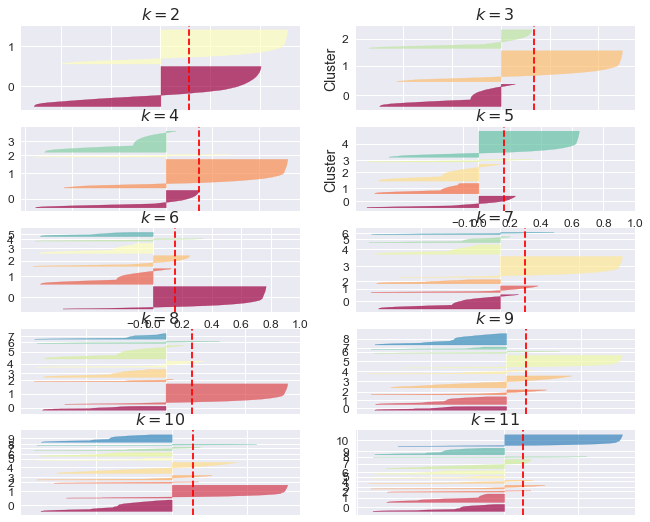

In [32]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6,7,8,9,10,11):
    plt.subplot(5, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)